Name : Fredrick Joel F

Roll No : 235229106

Part 1

In [ ]:
from keras.datasets import cifar10
from keras.utils import to_categorical

# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [ ]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [ ]:
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_test, y_test),
    epochs=1,
    callbacks=[early_stopping]
)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 737s 470ms/step - accuracy: 0.4717 - loss: 3.3539 - val_accuracy: 0.6087 - val_loss: 1.1529


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 350ms/step - accuracy: 0.6093 - loss: 1.1573
Test Accuracy: 60.87%


Part 2

In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from keras.preprocessing import image
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
model = ResNet50(weights='imagenet')
img_path = '/content/drive/MyDrive/DL Lab/Week4/horse.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


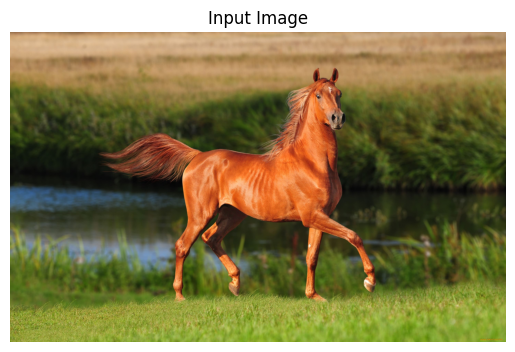

1: sorrel (0.62)
2: hartebeest (0.18)
3: gazelle (0.06)
4: Irish_setter (0.05)
5: impala (0.03)
6: cock (0.02)
7: vizsla (0.01)
8: Irish_terrier (0.01)
9: dhole (0.00)
10: llama (0.00)


In [ ]:
predictions = model.predict(x)
decoded_predictions = decode_predictions(predictions, top=10)[0]
img_pil = Image.open(img_path)  # Open the original image using PIL
plt.imshow(img_pil)
plt.axis('off')  # Hide axes
plt.title('Input Image')
plt.show()
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

Part 3

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping


In [1]:

train_dir = '/content/drive/MyDrive/DL Lab/Week4/sample_submission.csv'
valid_dir = '/content/drive/MyDrive/DL Lab/Week4/Testing_set_flower.csv'

# Create data generators
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Load images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'

